In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('titanic.csv', index_col=0)

In [5]:
y = df['Survived']
cat_cols = ['Pclass', 'Sex']
cont_cols = ['SibSp', 'Parch', 'Fare']
ord_cols = ['Age']

X = df[cat_cols + ord_cols + cont_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
cat_pipe = Pipeline([('cat', OneHotEncoder(handle_unknown='ignore'))])
ord_pipe = Pipeline([('imp', SimpleImputer(strategy='median')),
                     ('bin', KBinsDiscretizer(strategy='uniform'))])

cont_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                      ('scale', StandardScaler())])

cf = ColumnTransformer([('cat', cat_pipe, cat_cols),
                        ('ord', ord_pipe, ord_cols),
                        ('cont', cont_pipe, cont_cols)])

pipe = Pipeline([('cf', cf),
                 ('regress', LogisticRegression())])

param_grid = {'regress__C': np.logspace(-1, 2, 20),
              'cf__ord__bin__n_bins': [3, 5, 10],
              'cf__cont__poly__degree': [1,2,3]}

lr = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_brier_score')
lr.fit(X_train, y_train)

/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
 

/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
 

/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
 

/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/christopherdolan/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cf',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('cat',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imp',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('bin',
                                                           

In [21]:
(-1) *lr.score(X_test, y_test)

0.14318813396233787

In [17]:
np.mean((y_test - np.mean(y_train))**2)

0.2348837005508861

In [18]:
1 - (-1) *lr.score(X_test, y_test) / np.mean((y_test - np.mean(y_train))**2)

0.3566205171936414

<AxesSubplot:xlabel='y_pred', ylabel='y'>

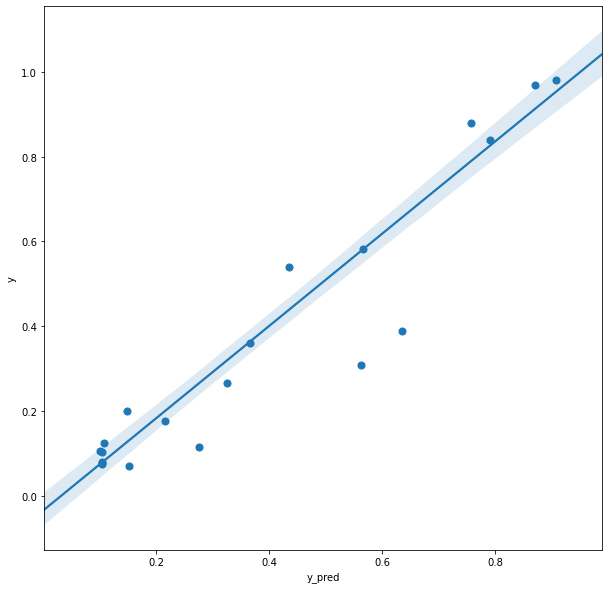

In [19]:
y_pred = lr.predict_proba(X_train)[:,1]

df_out = pd.DataFrame(data={'y': y_train, 'y_pred': y_pred})

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

sns.regplot(x='y_pred', y='y', data=df_out, x_bins=20, x_ci=None)